In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [15]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

    def net_input(self, X):
        return np.dot(X, self.w_[1:] + self.w_[0])

    def predict(self, X):
        return np.where(self.net_input(X) > 0.0, 1, -1)

    def train(self, X, y):
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self


In [17]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',1,-1)
X=df.iloc[0:100,[0,2]].values

In [18]:
ppn=Perceptron()

weights:[ 0.02   0.026 -0.104]


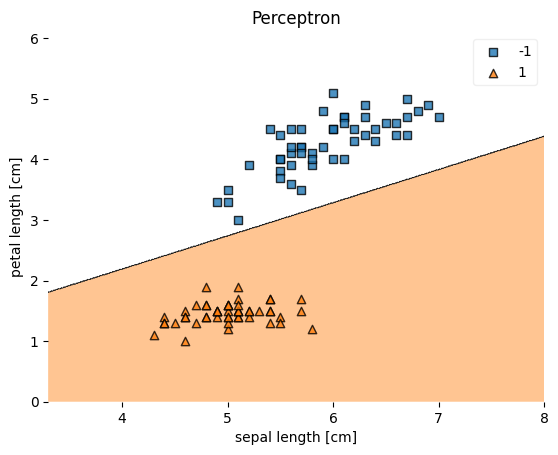

In [19]:
ppn.train(X,y)
print('weights:%s'%ppn.w_)
plot_decision_regions(X,y,clf=ppn)
plt.title('Perceptron')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.show()

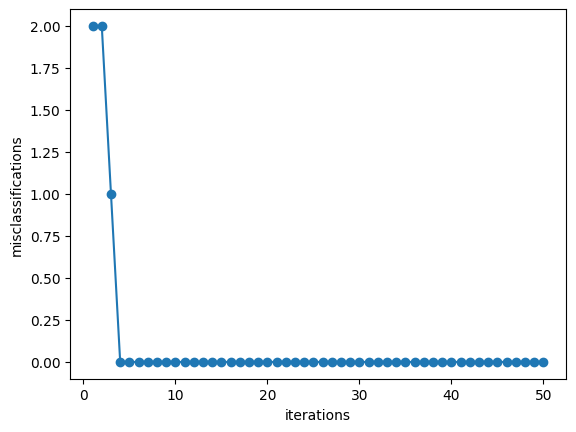

In [20]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('iterations')
plt.ylabel('misclassifications')
plt.show()